In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from pylamp.neural.layers import Linear
from pylamp.neural.activations import Sigmoid, TanH, ReLU
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import BCELoss, MSELoss
from pylamp.utils.data import DataGenerator as dg 

from pylamp.neural.sequentiel import Sequentiel

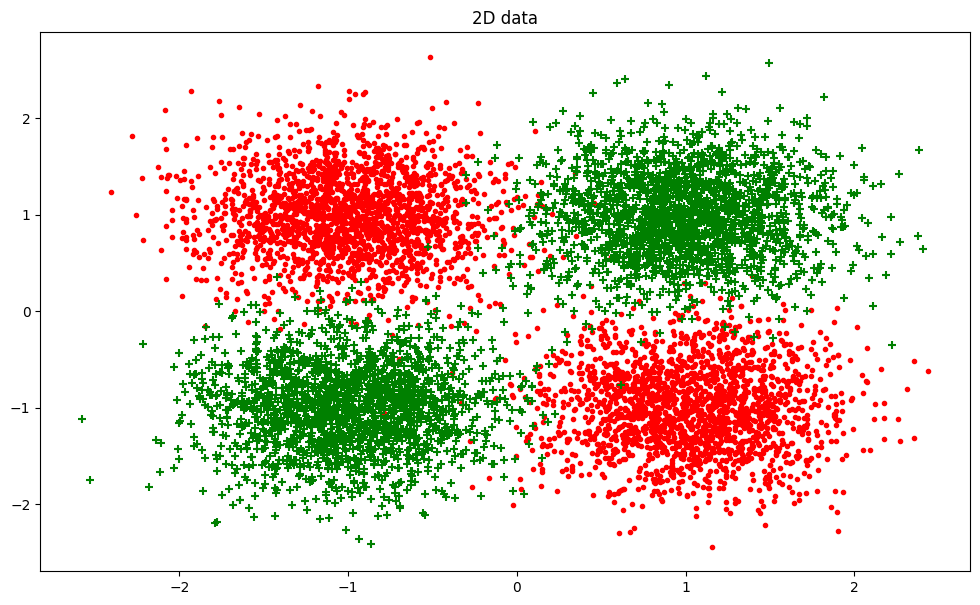

In [11]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=1, epsilon=0.3, train_size=0.8, nbex=10000)
dg.plot_2D_data(X_train, y_train)

In [12]:
class ModelTest():
    def __init__(self, models) -> None:
        self.models = models
    
    def forward(self,X):
        output = X 
        for model in self.models:
            output = model.forward(output)
        return output

In [13]:
input_size = X_train.shape[1]
hidden_size = 8
output_size = y_train.shape[1]

print(f'input_size: {input_size}, output_size: {output_size}')

fc1 = Linear(input_size, hidden_size, use_bias=True)
fc2 = Linear(hidden_size, output_size, use_bias=True)
tanh = TanH()
sigmoid = Sigmoid()
model_to_plot = ModelTest([fc1,tanh,fc2,sigmoid])
loss = BCELoss()
train_loss = SGD.step_multiple(
    fc1,fc2,tanh,sigmoid, loss, X_train=X_train, y_train=y_train, 
    epochs=300, lr=1e-3, batch_size=256, verbose=True,
    plot_boundary = True, model_to_plot=model_to_plot
)

Epoch 270 : Train loss : 0.032363494545294046
Model updated 9300 times.


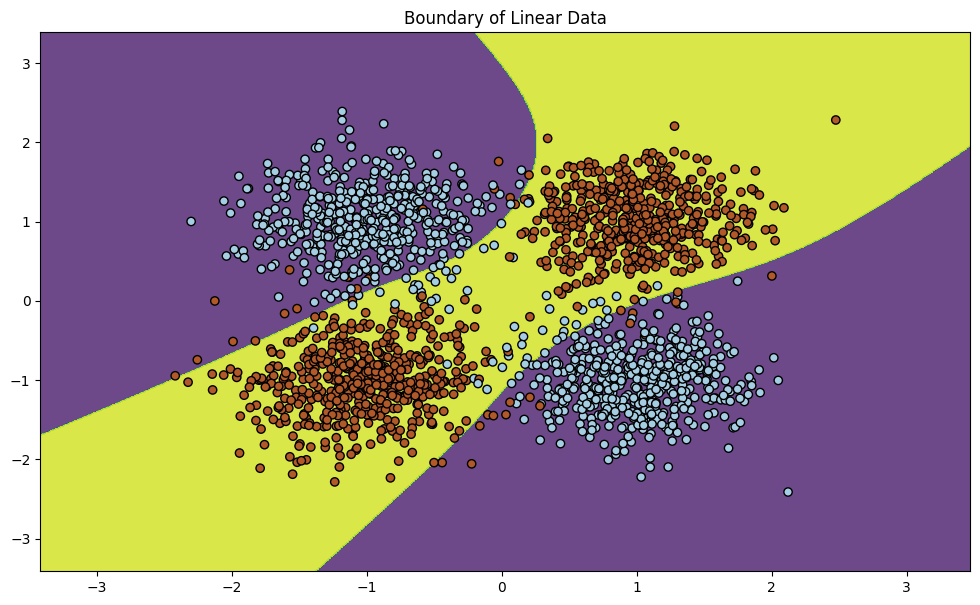

In [14]:
dg.plot_decision_boundary(X_test, y_test, model_to_plot, "Boundary of Linear Data")

## Testing Sequentiel model

In [42]:
# Create a sequential model
model = Sequentiel()

# Add modules to the sequential model
model.add_module(Linear(input_size=2, output_size=8))
model.add_module(TanH())
model.add_module(Linear(input_size=8, output_size=1))
model.add_module(Sigmoid())

loss_func = BCELoss()

batch_size = 25

for i in range(1000):
    train_data = dg.batch_generator(X_train, y_train, batch_size)
    for batch_x, batch_y in train_data:
        model.zero_grad()
        # Forward pass
        output = model.forward(batch_x)
        # Backward pass
        delta = loss_func.backward(batch_y, output)
        model.backward(delta,1e-3)


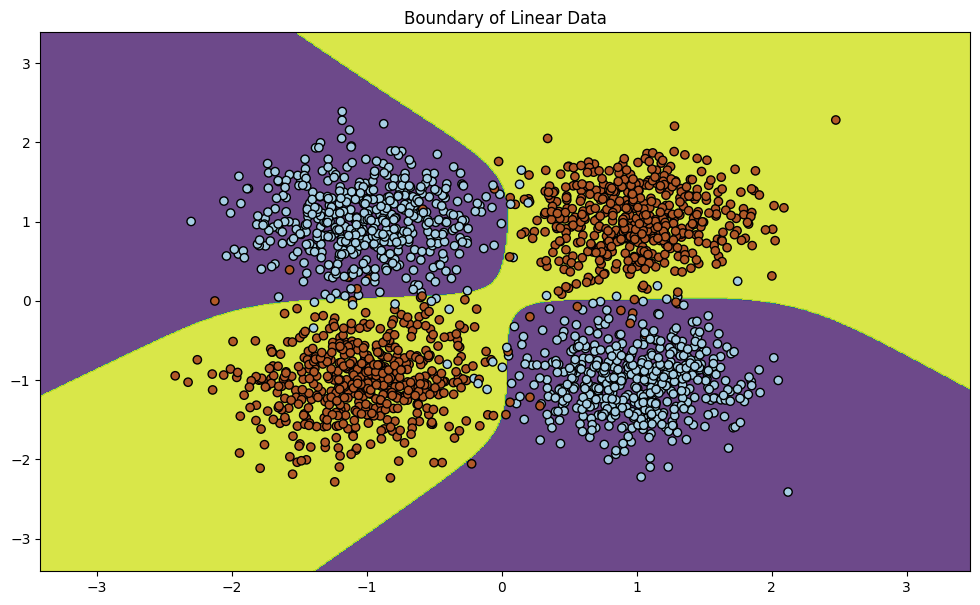

In [43]:
dg.plot_decision_boundary(X_test, y_test, model, "Boundary of Linear Data")
